In [4]:
# Use py10 environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Print all columns of a dataframe
pd.set_option('display.max_columns', None)

In [5]:
file = 'Data\\2023-2024.csv'
df = pd.read_csv(file)
df.columns

Index(['fin_year', 'month', 'state_code', 'state_name', 'district_code',
       'district_name', 'Approved_Labour_Budget',
       'Average_Wage_rate_per_day_per_person',
       'Average_days_of_employment_provided_per_Household',
       'Differently_abled_persons_worked', 'Material_and_skilled_Wages',
       'Number_of_Completed_Works', 'Number_of_GPs_with_NIL_exp',
       'Number_of_Ongoing_Works', 'Persondays_of_Central_Liability_so_far',
       'SC_persondays', 'SC_workers_against_active_workers', 'ST_persondays',
       'ST_workers_against_active_workers', 'Total_Adm_Expenditure',
       'Total_Exp', 'Total_Households_Worked', 'Total_Individuals_Worked',
       'Total_No_of_Active_Job_Cards', 'Total_No_of_Active_Workers',
       'Total_No_of_HHs_completed_100_Days_of_Wage_Employment',
       'Total_No_of_JobCards_issued', 'Total_No_of_Workers',
       'Total_No_of_Works_Takenup', 'Wages', 'Women_Persondays',
       'percent_of_Category_B_Works',
       'percent_of_Expenditure_on_Ag

In [6]:
df.head()

,fin_year,month,state_code,state_name,district_code,district_name,Approved_Labour_Budget,Average_Wage_rate_per_day_per_person,Average_days_of_employment_provided_per_Household,Differently_abled_persons_worked,Material_and_skilled_Wages,Number_of_Completed_Works,Number_of_GPs_with_NIL_exp,Number_of_Ongoing_Works,Persondays_of_Central_Liability_so_far,SC_persondays,SC_workers_against_active_workers,ST_persondays,ST_workers_against_active_workers,Total_Adm_Expenditure,Total_Exp,Total_Households_Worked,Total_Individuals_Worked,Total_No_of_Active_Job_Cards,Total_No_of_Active_Workers,Total_No_of_HHs_completed_100_Days_of_Wage_Employment,Total_No_of_JobCards_issued,Total_No_of_Workers,Total_No_of_Works_Takenup,Wages,Women_Persondays,percent_of_Category_B_Works,percent_of_Expenditure_on_Agriculture_Allied_Works,percent_of_NRM_Expenditure,percentage_payments_gererated_within_15_days,Remarks
0,2023-2024,Jan,2,ANDHRA PRADESH,203,VISAKHAPATANAM,1420104,253.211507,51,232,787.977983,2776,0,5537,1419664,130266,4489,12147,485,408.78420,4791.514795,27444,38908,31950,50539,2608,35647,56287,8313,3594.752612,1037881,66,7.35,74.78,100.00,NaN
1,2023-2024,Jan,2,ANDHRA PRADESH,206,KRISHNA,6655535,253.559183,44,2439,5995.072057,30207,0,35425,6655534,2510127,120044,103385,5444,1079.92497,23950.714642,150430,258711,174187,321087,10960,212971,378051,65632,16875.717616,3583120,34,67.23,7.69,99.99,NaN
2,2023-2024,Jan,2,ANDHRA PRADESH,213,KURNOOL,9004445,263.333349,45,2923,9530.788655,18483,2,34410,9004445,1810994,108023,126030,6905,1409.98225,34652.477493,196365,344137,262290,510131,9936,321576,617888,52893,23711.706589,4909519,42,51.22,26.46,99.96,NaN
3,2023-2024,Jan,3,ARUNACHAL PRADESH,305,UPPER SUBANSIRI,1070820,239.917983,62,265,2657.962535,183,0,707,1919825,511,9,1916411,30928,184.93800,7448.905955,30915,31032,30918,30988,9,33102,33207,890,4606.005420,962498,0,63.60,0.70,127.20,NaN
4,2023-2024,Jan,3,ARUNACHAL PRADESH,307,EAST SIANG,288135,483.635252,13,0,53.721283,131,78,27,9157,0,0,9139,12371,43.81745,141.825213,688,688,8144,12384,0,9209,15370,158,44.286480,4747,10,0.00,2.45,100.00,NaN


In [7]:
#List the columns that have missing values
miss_val_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:" , miss_val_cols)

# Count the number of missing values in the columns listed in miss_val_cols
for col in miss_val_cols:
    print('Column Name:', col, 'Missing Values:', df[col].isnull().sum())

Columns with missing values: ['Remarks']
Column Name: Remarks Missing Values: 8880


All rows in the 'Remarks' column have missing values. We will drop this column.

In [8]:
# drop 'Remarks' column
df.drop('Remarks', axis=1, inplace=True)

In [9]:
column_name = 'fin_year'
print('Number of unique values in column ' + column_name + ' is: ', df[column_name].value_counts())

Number of unique values in column fin_year is:  fin_year
2023-2024    8880
Name: count, dtype: int64


Total number of rows are 8880. 

In [10]:
column_name = 'month'
print('Number of unique values in column ' + column_name + ' is: ', df[column_name].value_counts())

Number of unique values in column month is:  month
Jan      740
Feb      740
March    740
May      740
April    740
June     740
July     740
Sep      740
Aug      740
Oct      740
Dec      740
Nov      740
Name: count, dtype: int64


Data from every month is present in the dataset.

In [11]:
column_name = 'state_code'
print('Number of unique values in column ' + column_name + ' is: ', df[column_name].value_counts().sort_index())

Number of unique values in column state_code is:  state_code
1      36
2     312
3     300
4     420
5     456
7      12
10     24
11    396
12    264
13    144
14    240
15    372
16    168
17    624
18    408
19     12
20    192
21    144
22    132
23    132
24    360
25     24
26    276
27    396
28     72
29    444
30     96
31    900
32    276
33    396
34    288
35    156
36    384
37     24
Name: count, dtype: int64


Some State Codes are missing.

In [12]:
# Check for the missing codes in the state_code column between 1 and 37
counting = range(1, 38)
missing_codes = [x for x in counting if x not in df['state_code'].unique()]
print('Missing codes in state_code column:', missing_codes)

Missing codes in state_code column: [6, 8, 9]


Three numbers are missing between 1 and 37. Thus, we have 34 unique State Codes.

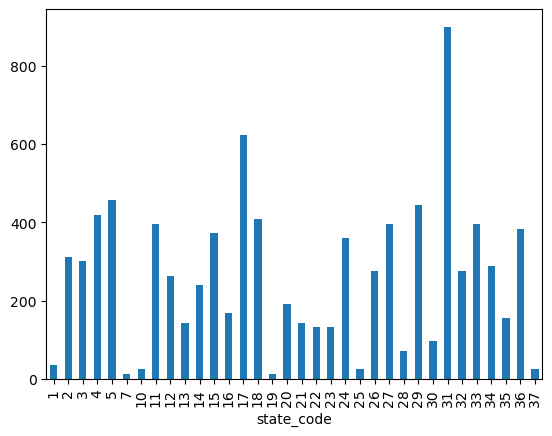

In [13]:
# Plot the bar graph for the state_code column
df['state_code'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [14]:
column_name = 'state_name'
# print('Number of unique values in column ' + column_name + ' is: ', df[column_name].value_counts())
# Print sorted value counts in ascending order of the values
print('Number of unique values in column ' + column_name + ' is: ', df[column_name].value_counts().sort_index())
if df[column_name].isnull().sum() > 0:
    print('Number of missing values in column' + column_name + ' is: ', df[column_name].isnull().sum())
else:
    print('No missing values in column ' + column_name)

Number of unique values in column state_name is:  state_name
ANDAMAN AND NICOBAR     36
ANDHRA PRADESH         312
ARUNACHAL PRADESH      300
ASSAM                  420
BIHAR                  456
CHHATTISGARH           396
DN HAVELI AND DD        12
GOA                     24
GUJARAT                396
HARYANA                264
HIMACHAL PRADESH       144
JAMMU AND KASHMIR      240
JHARKHAND              288
KARNATAKA              372
KERALA                 168
LADAKH                  24
LAKSHADWEEP             12
MADHYA PRADESH         624
MAHARASHTRA            408
MANIPUR                192
MEGHALAYA              144
MIZORAM                132
NAGALAND               132
ODISHA                 360
PUDUCHERRY              24
PUNJAB                 276
RAJASTHAN              396
SIKKIM                  72
TAMIL NADU             444
TELANGANA              384
TRIPURA                 96
UTTAR PRADESH          900
UTTARAKHAND            156
WEST BENGAL            276
Name: count, dtype: i

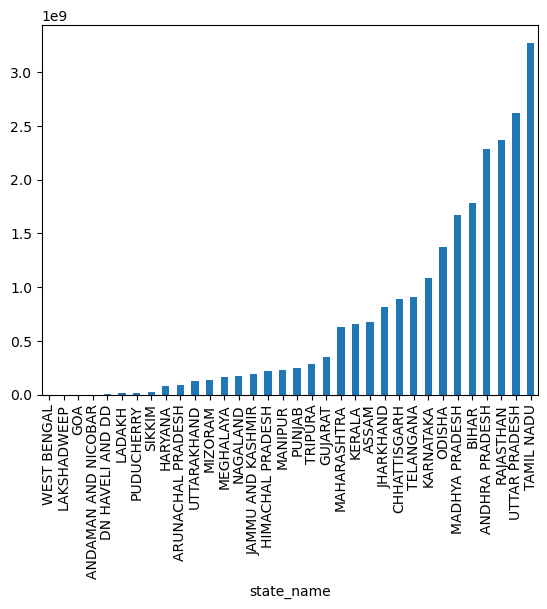

In [15]:
## Approved Labour Budget Statewise

# Add all the "Approved_Labour_Budget" for a particular 'state_name'
# Visualize the state-wise 'Approved_Labour_Budget' data using bar graph
column_name = 'Approved_Labour_Budget'
df.groupby('state_name')[column_name].sum().sort_values().plot(kind='bar')
plt.show()

In [16]:
# Print the statewise bugget allocated in the numerical form
print(df.groupby('state_name')[column_name].sum().sort_values())


state_name
WEST BENGAL                     0
LAKSHADWEEP                 65133
GOA                        530485
ANDAMAN AND NICOBAR        805121
DN HAVELI AND DD          3094636
LADAKH                   12793933
PUDUCHERRY               16468666
SIKKIM                   25051853
HARYANA                  81827200
ARUNACHAL PRADESH        94820372
UTTARAKHAND             129372448
MIZORAM                 135624646
MEGHALAYA               162909681
NAGALAND                171634338
JAMMU AND KASHMIR       190391748
HIMACHAL PRADESH        221254988
MANIPUR                 228331261
PUNJAB                  250386390
TRIPURA                 283940206
GUJARAT                 351549267
MAHARASHTRA             632746398
KERALA                  654970019
ASSAM                   680102617
JHARKHAND               816289672
CHHATTISGARH            893784156
TELANGANA               912343896
KARNATAKA              1082709819
ODISHA                 1376641682
MADHYA PRADESH         1675999990
BIH

In [17]:
#Print the rows with name of the state as 'WEST BENGAL'
df[df['state_name'] == 'WEST BENGAL']

,fin_year,month,state_code,state_name,district_code,district_name,Approved_Labour_Budget,Average_Wage_rate_per_day_per_person,Average_days_of_employment_provided_per_Household,Differently_abled_persons_worked,Material_and_skilled_Wages,Number_of_Completed_Works,Number_of_GPs_with_NIL_exp,Number_of_Ongoing_Works,Persondays_of_Central_Liability_so_far,SC_persondays,SC_workers_against_active_workers,ST_persondays,ST_workers_against_active_workers,Total_Adm_Expenditure,Total_Exp,Total_Households_Worked,Total_Individuals_Worked,Total_No_of_Active_Job_Cards,Total_No_of_Active_Workers,Total_No_of_HHs_completed_100_Days_of_Wage_Employment,Total_No_of_JobCards_issued,Total_No_of_Workers,Total_No_of_Works_Takenup,Wages,Women_Persondays,percent_of_Category_B_Works,percent_of_Expenditure_on_Agriculture_Allied_Works,percent_of_NRM_Expenditure,percentage_payments_gererated_within_15_days
132,2023-2024,Jan,32,WEST BENGAL,3216,24 PARGANAS SOUTH,0,259.462310,18,24,0.0,7287,255,191888,81906,6157,320830,217,11781,1310.69665,1523.211850,4312,5618,970984,1728504,0,1403487,2361923,199175,212.515200,38613,69,59.83,0.05,100.67
133,2023-2024,Jan,32,WEST BENGAL,3219,Darjeeling Gorkha Hill Council (DGHC),0,0.000000,0,0,0.0,22,70,10272,0,0,15048,0,65927,0.00000,0.000000,0,0,121526,200258,0,127896,208798,10294,0.000000,0,18,0.00,0.00,0.00
281,2023-2024,Feb,32,WEST BENGAL,3201,NADIA,0,225.161520,17,0,0.0,257,177,23808,1263,30,175417,0,18219,976.91888,979.762670,73,75,359615,764047,0,764448,1486020,24065,2.843790,666,55,93.14,0.00,100.00
282,2023-2024,Feb,32,WEST BENGAL,3202,PASCHIM BARDHAMAN,0,873.000000,15,0,0.0,5,60,2608,30,15,98946,0,25877,363.60786,363.869760,2,2,87540,190973,0,140106,286585,2613,0.261900,30,29,0.00,0.00,100.00
283,2023-2024,Feb,32,WEST BENGAL,3211,PURBA MEDINIPUR,0,220.891912,27,0,0.0,822,214,80948,1224,43,152693,0,5104,1245.93680,1248.640517,45,54,558310,1250860,0,918126,1959817,81770,2.703717,512,63,4.83,0.03,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8861,2023-2024,Dec,32,WEST BENGAL,3205,HOWRAH,0,0.000000,0,0,0.0,83,156,18268,0,0,69145,0,955,415.93306,416.073550,0,0,214512,341027,0,404797,576699,18351,0.140490,0,20,0.59,0.00,0.00
8862,2023-2024,Dec,32,WEST BENGAL,3208,COOCHBEHAR,0,0.000000,0,0,0.0,464,128,73782,0,0,574372,0,7372,654.68835,654.688350,0,0,562861,1086684,0,660544,1253699,74246,0.000000,0,39,5.45,4.00,0.00
8863,2023-2024,Dec,32,WEST BENGAL,3218,DINAJPUR UTTAR,0,195.454545,1,0,0.0,183,83,84348,44,0,135660,0,14308,341.05358,341.139580,24,30,257818,513861,0,509558,951779,84531,0.086000,24,85,0.47,0.03,100.00
8864,2023-2024,Dec,32,WEST BENGAL,3220,ALIPURDUAR,0,0.000000,0,0,0.0,253,64,64330,0,0,158787,0,120490,234.67670,234.676700,0,0,292236,582491,0,326712,638793,64583,0.000000,0,58,12.32,2.49,0.00
